In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [49]:
coffee_production = pd.read_csv("../Data/coffee/total-production.csv").T

coffee_production.columns= coffee_production.iloc[0]

coffee_production.drop("total_production", inplace=True)

In [50]:
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.87,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.52,120.235,34603.3542,620.238,1185.48,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.79,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.047,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [51]:
coffee_df = coffee_production.copy()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_7524\209777970.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4_bar.set_yticklabels(["BR","VN","CO","ID","ET","OTH"][::-1])


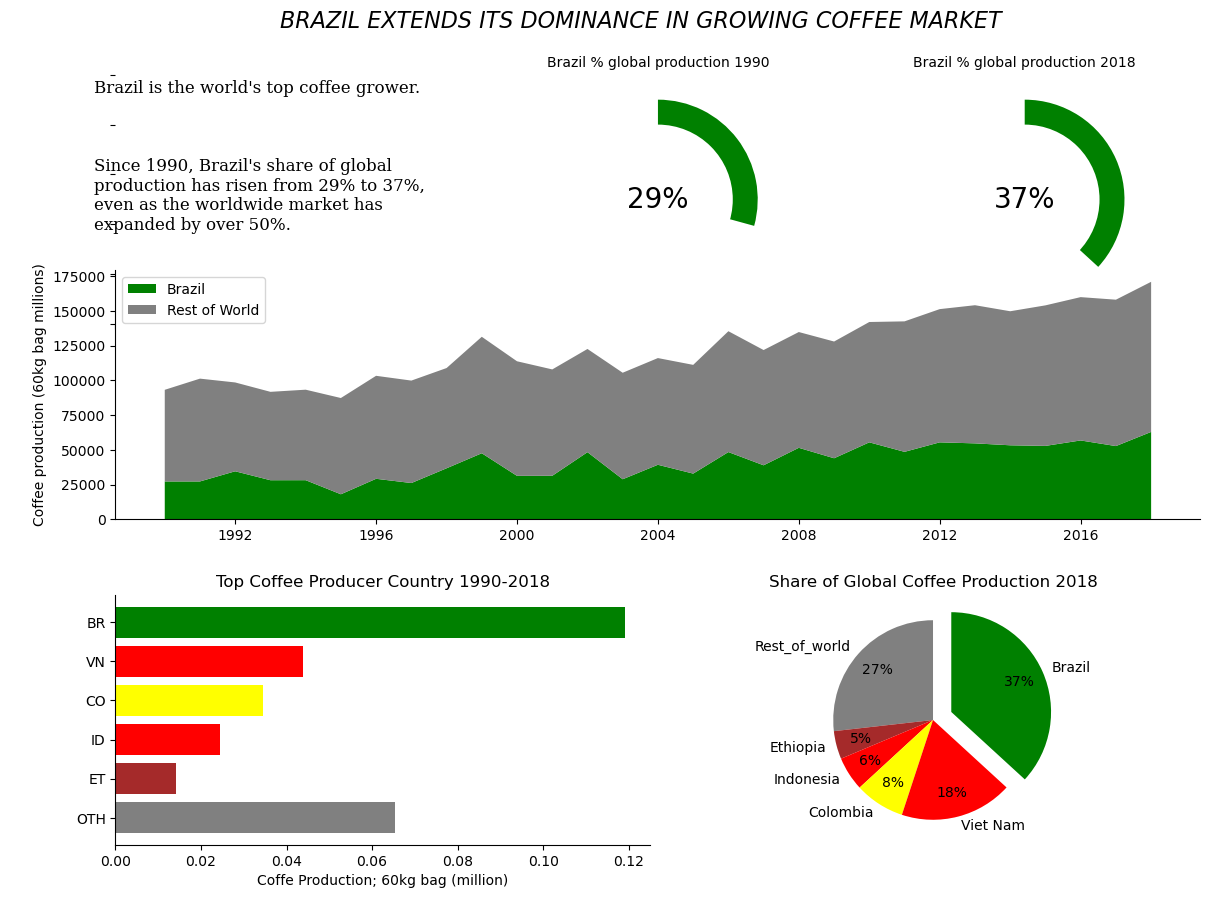

In [52]:
brazil_vs_others =(coffee_df.assign(
                   rest_of_world = coffee_df.drop("Brazil",axis=1).sum(axis = 1)
                   )).loc[:, ["Brazil","rest_of_world"]].astype({"Brazil":"int","rest_of_world":"int"})
brazil_vs_others.index = brazil_vs_others.index.astype("datetime64[ns]")

brazil_1990 = brazil_vs_others.loc["1990"].squeeze()
brazil_2018 = brazil_vs_others.loc["2018"].squeeze()

top5_producer = coffee_df.transpose().sum(axis=1).sort_values(ascending=False).iloc[:5]

other_producer = pd.Series(coffee_df.drop(columns=top5_producer.index, axis=1).transpose().sum(axis=1).sort_values(ascending=False).iloc[5:].sum())
other_producer.index = ["Other"]

top5_vs_others_total = pd.concat([top5_producer.sort_values(ascending=False), other_producer])

top5_vs_other_byYear = (coffee_df.assign(
                        Rest_of_world = coffee_df.drop(columns=top5_producer.index.tolist(),axis=1).sum(axis=1)
)).loc[:,top5_producer.index.append(pd.Index(["Rest_of_world"]))]

fig, axes = plt.subplots(figsize=(14,10))
axes.set_axis_off()

grids = gridspec.GridSpec(ncols=12, nrows=12, figure=fig)

ax_text = fig.add_subplot(grids[0:4, 0:4])
ax_text.text(s=
                '''
                Brazil is the world's top coffee grower.



                Since 1990, Brazil's share of global 
                production has risen from 29% to 37%, 
                even as the worldwide market has 
                expanded by over 50%.
                ''',
                y=0.3,
                x=-0.3,
                fontsize=12,
                fontweight='light', 
                fontfamily='serif'
)
ax_text.spines["top"].set_visible(False)
ax_text.spines["right"].set_visible(False)
ax_text.spines["bottom"].set_visible(False)
ax_text.spines["left"].set_visible(False)
ax_text.set_xticklabels([])
ax_text.set_yticklabels([])



ax1_pie = fig.add_subplot(grids[0:4, 4:8])
ax1_pie.pie(
    x=brazil_1990[::-1],
    startangle=90,
    colors=["white","green"]
)
ax1_pie.text(0,
             0,
             s=f'{round(brazil_1990["Brazil"]/brazil_1990.sum()*100)}%',
             fontsize=20,
             ha="center",
             va="center",
             )

circle = plt.Circle((0,0), 0.75, fc="white")
ax1_pie.add_patch(circle)
ax1_pie.set_title("Brazil % global production 1990", fontsize=10)

ax2_pie = fig.add_subplot(grids[0:4, 8:12])
ax2_pie.pie(
    x=brazil_2018[::-1],
    startangle=90,
    colors=["white","green"]
)
ax2_pie.text(0,
             0,
             s=f'{round(brazil_2018["Brazil"]/brazil_2018.sum()*100)}%',
             fontsize=20,
             ha="center",
             va="center",
             )

circle = plt.Circle((0,0), 0.75, fc="white")
ax2_pie.add_patch(circle)
ax2_pie.set_title("Brazil % global production 2018", fontsize=10)

ax3_stack = fig.add_subplot(grids[3:7, 0:12])
ax3_stack.stackplot(
    brazil_vs_others.index,
    brazil_vs_others["Brazil"], 
    brazil_vs_others["rest_of_world"],
    labels=["Brazil","Rest of World"],
    colors=["green","grey"]
)
ax3_stack.spines["top"].set_visible(False)
ax3_stack.spines["right"].set_visible(False)
ax3_stack.legend(loc='upper left')
ax3_stack.set_ylabel("Coffee production (60kg bag millions)")

ax4_bar = fig.add_subplot(grids[8:,0:6 ])
ax4_bar.barh(
    y=top5_vs_others_total.index[::-1],
    width=top5_vs_others_total.values[::-1]/10000000,
    color=["green","red","yellow","red","brown","grey"][::-1]
)
ax4_bar.spines["top"].set_visible(False)
ax4_bar.spines["right"].set_visible(False)
ax4_bar.set_yticklabels(["BR","VN","CO","ID","ET","OTH"][::-1])
ax4_bar.set_title("Top Coffee Producer Country 1990-2018")
ax4_bar.set_xlabel("Coffe Production; 60kg bag (million)")


ax5_pie = fig.add_subplot(grids[8:,6:12 ])
ax5_pie.pie(
    x=top5_vs_other_byYear.loc["2018"][::-1],
    startangle=90,
    labels=top5_vs_other_byYear.columns[::-1],
    explode=[0.2,0,0,0,0,0][::-1],
    autopct="%.0f%%",
    pctdistance=0.75,
    colors=["green","red","yellow","red","brown","grey"][::-1]
)
ax5_pie.set_title("Share of Global Coffee Production 2018")
ax5_pie.spines["top"].set_visible(False)
ax5_pie.spines["right"].set_visible(False)

fig.suptitle("BRAZIL EXTENDS ITS DOMINANCE IN GROWING COFFEE MARKET", fontstyle="oblique", fontsize=16, y=0.945)

plt.show()


### Meshgrid Layout

# Subplots

* Read in `prices-paid-to-growers.csv` and create a subplot grid of histograms showing the distribution of prices paid to the countries Brazil, Colombia, Ethiopia, and one for all other nations.

In [53]:
prices_paid_to_growers = pd.read_csv("coffee/prices-paid-to-growers.csv").T.drop(9, axis=1)

prices_paid_to_growers.columns= prices_paid_to_growers.iloc[0]

prices_paid_to_growers.drop("prices_paid_to_growers", inplace=True)

prices_paid_to_growers["Other Nations"] =  prices_paid_to_growers.drop(["Colombia", "Brazil", "Ethiopia"], axis=1).mean(axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'coffee/prices-paid-to-growers.csv'

In [ ]:
prices_paid_to_growers.head()

prices_paid_to_growers,Colombia,Dominican Republic,El Salvador,Guatemala,Honduras,India,Uganda,Brazil,Ethiopia,India,Togo,Uganda,Other Nations
1990,1.534724,1.458168,1.116194,1.204956,1.11147,1.473558,0.337598,1.199223,1.348565,0.978921,0.645267,0.166486,0.943624
1991,1.48179,1.382845,0.983322,1.270086,1.238947,1.358371,0.654322,0.97115,1.505322,0.897289,0.632307,0.26143,0.964325
1992,1.204656,1.027841,0.682322,0.888099,0.886057,1.191159,0.441397,0.997768,1.351128,0.877945,0.658494,0.197653,0.761219
1993,1.106477,1.172704,0.780397,0.914552,0.828746,1.278669,0.552298,1.167263,1.362442,0.975912,0.499857,0.259737,0.806986
1994,1.898327,2.478234,2.191177,1.662711,1.800576,1.73081,1.666651,2.52911,2.418234,1.246437,0.573784,0.919709,1.585565


(array([5., 4., 3., 4., 4., 6., 0., 2., 0., 1.]),
 array([0.63767231, 0.9229374 , 1.2082025 , 1.4934676 , 1.7787327 ,
        2.06399779, 2.34926289, 2.63452799, 2.91979308, 3.20505818,
        3.49032328]),
 <BarContainer object of 10 artists>)

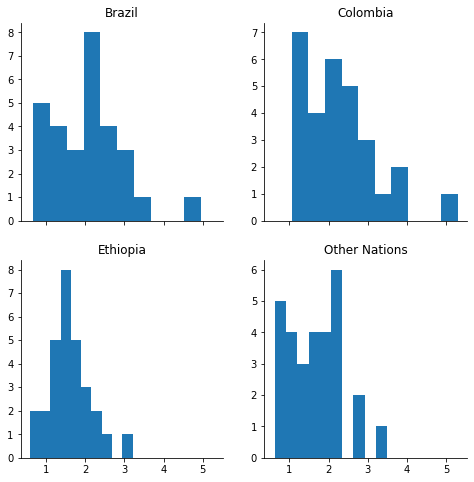